In [1]:
import pandas as pd

# Mostrando los datos
Vamos a cargar los datos de una compañía de bicicletas.

In [2]:
hour = pd.read_csv('D:\\cursos\\data_science\\data\\hour.csv')

Veámos una fracción de los datos con la función `head()`

In [3]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Podemos utilizar algunas funciones simpleas para medidas estadísticas como:
```python
median() # Mediana
mean() # Media
min() # Minimo
max() # Maximo
std() # Desviacion estandar
```
También es posible obtener un resumen estadístico con la funcion `describe()`. Mirando un resumen estadístico es fácil observar si hay errores obvios en las mediciones.

In [4]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Podemos seleccionar un *slice* de los datos utilizando brackets.

In [5]:
hour['count'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: count, dtype: float64

## Subconjuntos de datos
`Subsetting` significa seleccionar subconjuntos de datos de un dataset. Se puede utiliza el atributo `loc` para seleccionar subconjuntos de datos.

In [6]:
hour.loc[0:10, 'registered']

0     13
1     32
2     27
3     10
4      1
5      1
6      0
7      2
8      7
9      6
10    24
Name: registered, dtype: int64

También podemos establecer condiciones lógicas. Aquí seleccionamos el número de individuos registrados durante la madrugada, y obtenemos el promedio.

In [7]:
hour.loc[hour['hr'] < 5, 'registered'].mean()

20.7881427367238

Se puden utilizar operadores lógicos tales como `&` o `|`. Aquí obtenemos los individuos registrados durante la madrugada, según la temperatura, y obtenemos el promedio:

In [8]:
hour.loc[(hour['hr'] < 5) & (hour['temp'] < 0.50), 'registered'].mean()

16.428869202709745

In [9]:
hour.loc[(hour['hr'] < 5) & (hour['temp'] > 0.50), 'registered'].mean()

26.005859375

## Agrupar: `groupby()`
Podemos agrupar los datos según los valores de una columna. P. ej., agruparémos según la estación del año. Así, los distintos valores de la variable del grupo se agruparan en sus iguales.
```python
data.groupby(['group', ...]) # Agrupar en uno o mas grupos
```
Nótese cómo la función `head` muestra las primeras cinco filas de cada valor.

In [10]:
hour.groupby(['season']).head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
1807,1808,2011-03-21,2,0,3,0,0,1,1,3,0.34,0.3030,0.66,0.3881,2,11,13
1808,1809,2011-03-21,2,0,3,1,0,1,1,2,0.34,0.3030,0.71,0.3881,1,6,7
1809,1810,2011-03-21,2,0,3,2,0,1,1,2,0.34,0.3030,0.71,0.3284,1,5,6
1810,1811,2011-03-21,2,0,3,3,0,1,1,2,0.34,0.3030,0.71,0.3284,0,1,1
1811,1812,2011-03-21,2,0,3,5,0,1,1,1,0.32,0.3030,0.81,0.2985,1,1,2


Veámos el promedio de conteo en cada temporada.

In [11]:
hour.groupby('season')['count'].mean()

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64

Si agrupamos en más de un grupo, los resultados se mostrarán según los posibles valores de cada grupo. P. ej., agrupamos según la estación y sí es día festivo.

In [12]:
hour.groupby(['season','holiday'])['count'].mean()

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64

## Visualizando los datos: Matplotlib
La biblioteca Matplotlib es útil para la visualización de gráficos.

In [13]:
import matplotlib.pyplot as plt

### Diagramas de dispersión

Vamos a crear un gráfico. La variable `fig` contiene la información de los datos, mientras que `ax` nos permite acceder a los métodos.

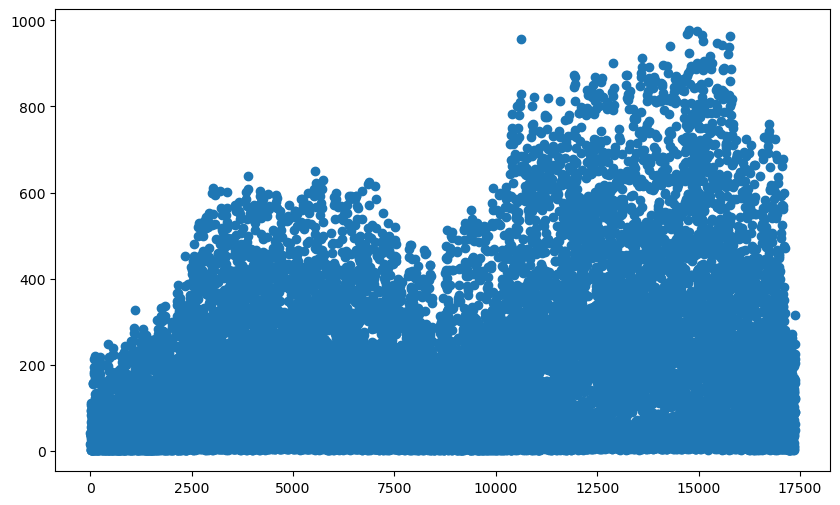

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour['instant'], y=hour['count'])
plt.show()

Este es un **diagrama de dispersión**, muy útil porque permite ver las variaciones del dataset. Para hacer más claro el gráfico, podemos manejar etiquetas

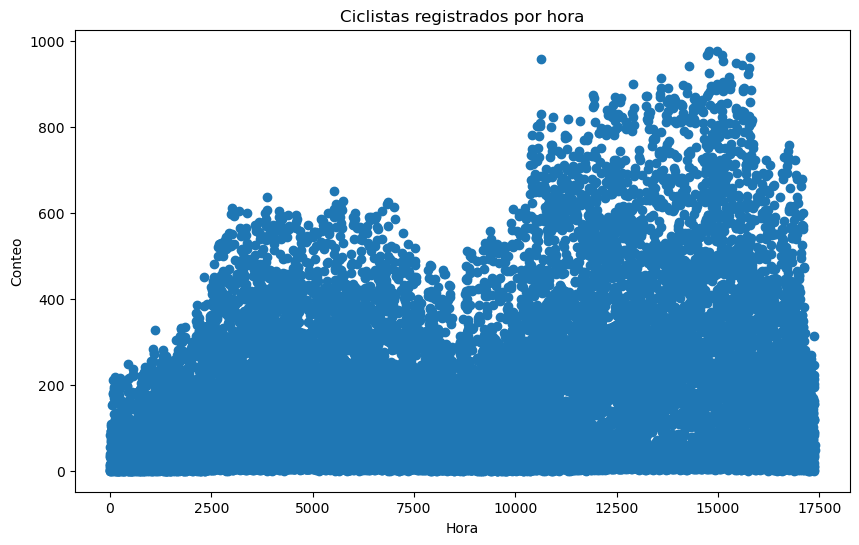

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour['instant'], y=hour['count'])
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.title('Ciclistas registrados por hora')
plt.show()

### Subconjuntos de datos
Siempre es buena idea visualizar tanto el conjunto completo de datos (como arriba), como una pequeña parte (abajo) para tener una mejor comprensión del dataset.

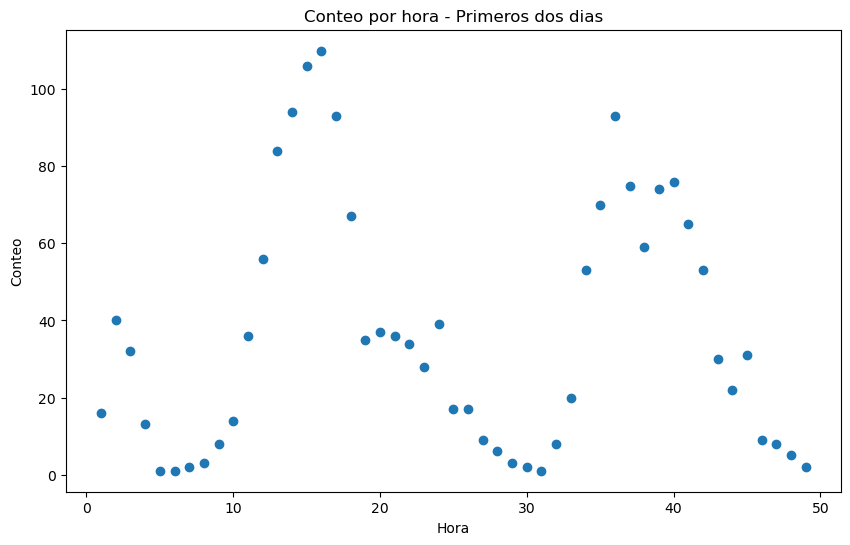

In [16]:
hour_first48 = hour.loc[0:48,:] # Variable que contiene los primeros dos dias
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour_first48['instant'], y=hour_first48['count'])
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.title('Conteo por hora - Primeros dos dias')
plt.show()

### Modificando `plot()`
Podemos hacer modificaciones a los gráficos, como cambiar el color o marca, cambiando los parámetros.

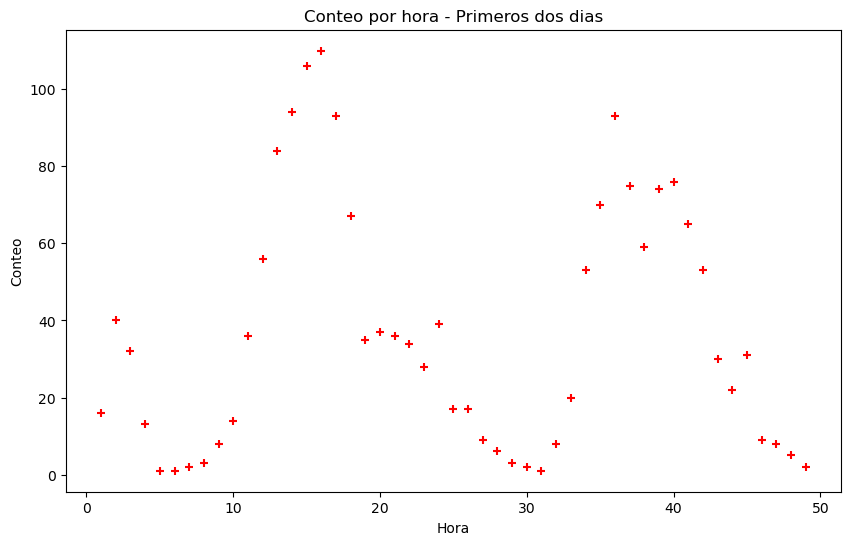

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour_first48['instant'], y=hour_first48['count'], c='red', marker='+') # Cambiar a rojo y marca (+)
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.title('Conteo por hora - Primeros dos dias')
plt.show()

### Diagrama de líneas
Vamos a hacer un diagrama que no sea de dispersión, por ejemplo de líneas. Para ello cambiamos de método `scatter()` a `plot()`. En este caso se unen con líneas los pares ordenados.

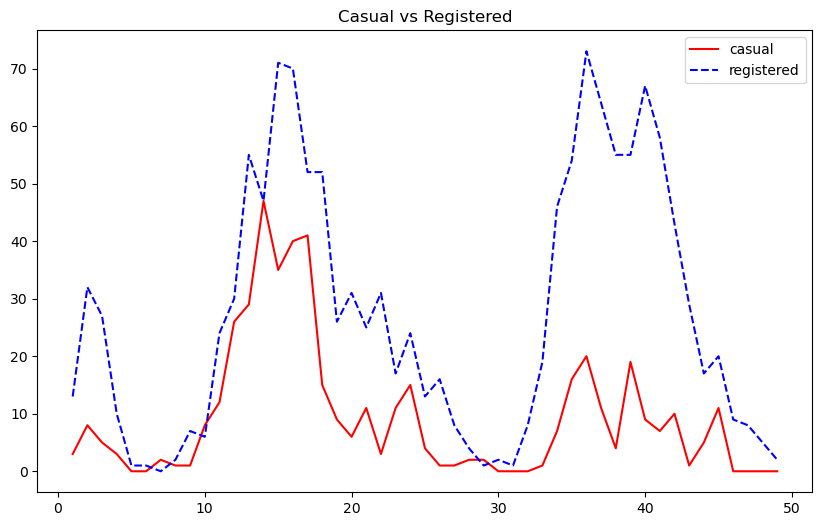

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hour_first48['instant'], hour_first48['casual'], c='red', label='casual', linestyle='-')
ax.plot(hour_first48['instant'], hour_first48['registered'], c='blue', label='registered', linestyle='--')
ax.legend()
plt.title('Casual vs Registered')
plt.show()

### Diagrama de caja
Un diagrama de caja muestra un buen resumen de un conjunto de datos. En la escala de los valores posibles se dibuja un rectángulo que:
* Sus lados (perpendiculares a la escala) representan el cuartil inferior y el cuartil superior. Además, una línea dentro de la caja que representa la mediana $\tilde{x}$.
* Del rectángulo sobresalen *bigotes* que representan los valores que no se consideran atípicos.
* Fuera de los bigotes se encuentran los datos atípicos.

>**Definición**: el **rango intercuartil**, $f_s$ se define como $$f_s=\text{cuarto superior}-\text{cuarto inferior}.$$
> 
> Se ha de considerar como **valor atípico** a cualquier valor que supere $1.5f_s$ respecto a los cuartiles. 

Para ello importamos el módulo `seaborn`.

In [19]:
import seaborn as sns

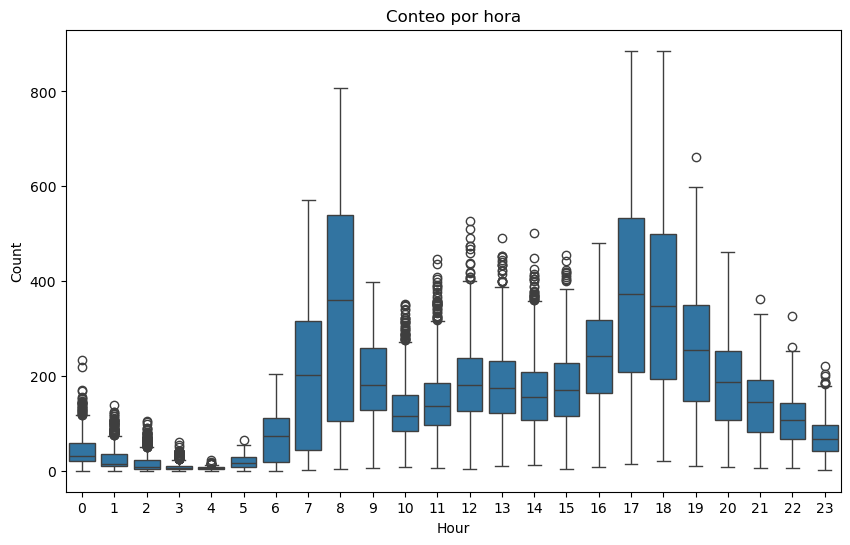

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='hr', y='registered', data=hour)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Conteo por hora')
plt.show()

### Histogramas
Los histogramas agrupan los datos en clases o grupos, y se construyen barras que representan la frecuencia o frecuencia relativa de las diferentes clases.

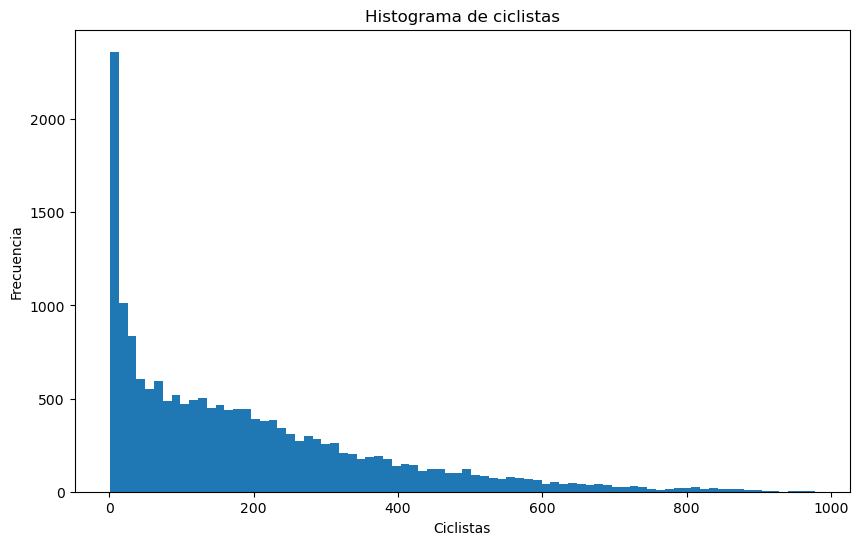

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(hour['count'],bins=80) # Número de clases
plt.xlabel('Ciclistas')
plt.ylabel('Frecuencia')
plt.title('Histograma de ciclistas')
plt.show()

### Pair plot
El tipo *pair plot* representa las posibles combinaciones de las variables otorgadas en pares.

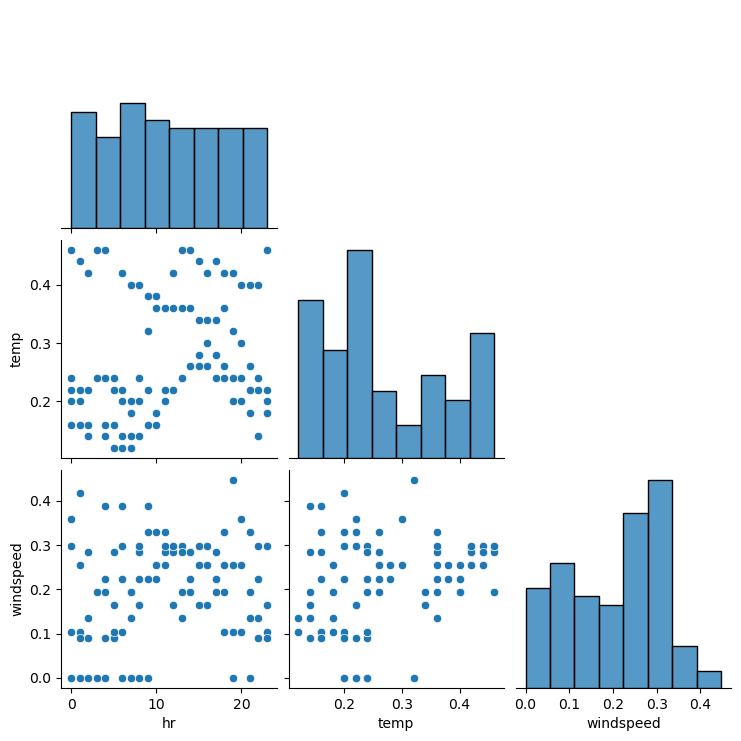

In [30]:
variables = ['hr', 'temp', 'windspeed']
hour_first100 = hour.loc[0:100, variables]
sns.pairplot(hour_first100, corner=True)
plt.show()

## Conociendo las correlaciones